# Filter Design

Reference: [Active Low-Pass Filter Design](https://www.ti.com/lit/an/sloa049d/sloa049d.pdf?ts=1681979767604)

In [1]:
# Imports
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

```{figure} SallenKeyHP.png
Sallen Key Filter: High Pass
```

\begin{align*}
W_0 &= \frac{1}{\tau \sqrt{mn}} \\[1em]
W_c &= \frac{W_0}{C_n}  \\[1em]
Q  &= \frac{\sqrt{mn}}{1+n} \\[1em]
m  &= \frac{R_1}{R_2}  \\[1em]
n  &= \frac{C_1}{C_2}  \\[1em]
\tau &= R_2 C_2
\end{align*}

In [2]:
s,m,n,C1,C2,R1,R2,Q,tau,W0 = sp.symbols('s,m,n,C1,C2,R1,R2,Q,tau,omega0')

In [3]:
# High Pass Bessel
systemHP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [Q - sp.sqrt(m*n)/(1+m)],
    [m - R1/R2],
    [n - C1/C2],
    [tau - R2*C2]
])

fc1 = 1                # Chosen Value [Hz]
Cn = 1.2736            # Table (Butterworth / Bessel / Chebyshev)
myVals = {
    W0:2*sp.pi*fc1*Cn,
    Q:0.5773,          # Table (Butterworth / Bessel / Chebyshev)
    n:2,               # Chosen Ratio 
    C2:1e-6            # Chosen Value 
}

systemHP = systemHP.subs(myVals)
eq = sp.solve(systemHP)
eq

[{R1: 45733.3292215825,
  R2: 170730.593180212,
  m: 0.267868390601263,
  tau: 0.170730593180212,
  C1: 2.00000000000000e-6},
 {R1: 170730.593180212,
  R2: 45733.3292215825,
  m: 3.73317657135796,
  tau: 0.0457333292215825,
  C1: 2.00000000000000e-6}]

In [4]:
f = np.logspace(-2, 4, 10000)
w = 2*np.pi*f

num = 1*s**2
a = 1
b = (1/R1)*(C1+C2)/(C1*C2)
c = 1/(R1*R2*C1*C2)
den = a*s**2 + b*s + c

components = {
    C1:2e-6,    # Fill in from calc.
    C2:1e-6,    # Fill in from calc.
    R1:171000,  # Fill in from calc.
    R2:45700    # Fill in from calc.
}
H = sp.Matrix([num/den])
H1 = H = H.subs(components)
H = lambdify(s,H,modules='numpy')
H = H(1j*w)
H = H[0][0]

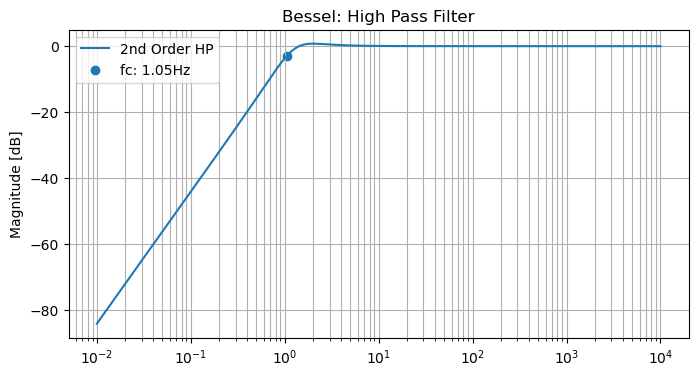

In [5]:
fig, ax = plt.subplots(figsize=(8,4))

x1 = np.where(20*np.log10(abs(H))<=-3)[0][-1]
label1 = "fc: {:.2f}Hz".format(f[x1])

ax.set_title('Bessel: High Pass Filter')
ax.semilogx(f, 20*np.log10(abs(H)),label=r'2nd Order HP')
ax.scatter(f[x1],20*np.log10(abs(H[x1])),label=label1,color='tab:blue')
ax.set_ylabel('Magnitude [dB]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

```{figure} SallenKeyLP.png
Sallen Key Filter : Low Pass
```

\begin{align*}
W_0 &= \frac{1}{\tau \sqrt{mn}} \\[1em]
W_c &= \frac{W_0}{C_n}  \\[1em]
Q  &= \frac{\sqrt{mn}}{1+n} \\[1em]
m  &= \frac{R_1}{R_2}  \\[1em]
n  &= \frac{C_2}{C_1}  \\[1em]
\tau &= R_2 C_1
\end{align*}

In [6]:
s,m,n,C1,C2,R1,R2,Q,tau,W0 = sp.symbols('s,m,n,C1,C2,R1,R2,Q,tau,omega0')

In [7]:
# Low Pass ChebyShev
systemLP = sp.Matrix([
    [W0 - 1/(tau*sp.sqrt(m*n))],
    [Q - sp.sqrt(m*n)/(1+m)],
    [m - R1/R2],
    [n - C2/C1],
    [tau - R2*C1]
])

fc1 = 5e3            # Chosen Value [Hz]
Cn = 1.2736          # Table (Butterworth / Bessel / Chebyshev)
myVals = {
    W0:2*sp.pi*fc1*Cn,  
    Q:0.5773,        # Table (Butterworth / Bessel / Chebyshev)
    m:1,             # Chosen Ratio 
    C2:1e-9         # Chosen Value 
}
systemLP = systemLP.subs(myVals)
eq = sp.solve(systemLP)
eq

[{C1: 7.50130620244903e-10,
  R1: 28856.8306051982,
  R2: 28856.8306051982,
  n: 1.33310116000000,
  tau: 2.16463922401795e-5}]

In [8]:
f = np.logspace(1, 5, 10000)
w = 2*np.pi*f

num = 1/(R1*R2*C1*C2)
a = 1
b = (1/C2)*(R1+R2)/(R1*R2)
c = 1/(R1*R2*C1*C2)
den = a*s**2 + b*s + c

components = {
    C1:0.75e-9,     # Fill in from calc.
    C2:1e-9,       # Fill in from calc.
    R1:29000,      # Fill in from calc.
    R2:29000       # Fill in from calc.
} 
H = sp.Matrix([num/den])
H2 = H = H.subs(components)
H = lambdify(s,H,modules='numpy')
H = H(1j*w)
H = H[0][0]

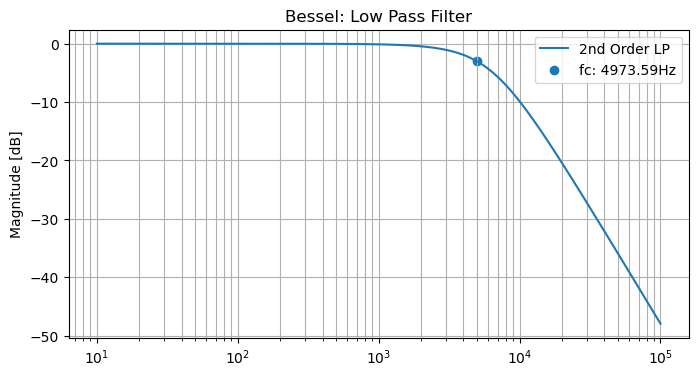

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

x1 = np.where(20*np.log10(abs(H))<=-3)[0][0]
label1 = "fc: {:.2f}Hz".format(f[x1])

ax.set_title('Bessel: Low Pass Filter')
ax.semilogx(f, 20*np.log10(abs(H)),label=r'2nd Order LP')
ax.scatter(f[x1],20*np.log10(abs(H[x1])),label=label1,color='tab:blue')
ax.set_ylabel('Magnitude [dB]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

<hr>

In [10]:
f = np.logspace(-1, 5, 100000)
w = 2*np.pi*f
H = H1 * H2
H = lambdify(s,H,modules='numpy')
H = H(1j*w)
H = H[0][0]

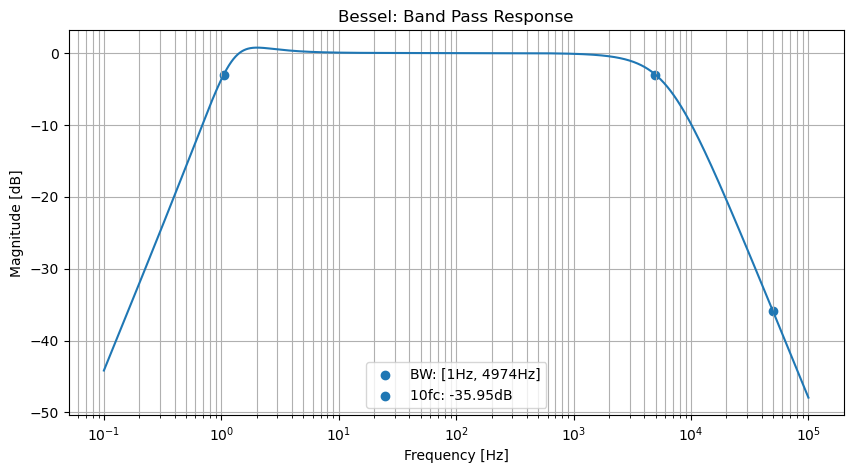

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

x0 = np.where(20*np.log10(abs(H[0:20000]))<=-3)[0][-1]
label0 = "{:.0f}Hz".format(f[x0])
x1 = 20000+np.where(20*np.log10(abs(H[20000:]))<=-3)[0][0]
label1 = "{:.0f}Hz".format(f[x1])
label1 = f"BW: [{label0}, {label1}]" 
x2 = np.where(f>=50000)[0][0]
label2 = "{:.2f}dB".format(20*np.log10(abs(H[x2])))
label2 = f"10fc: {label2}"

ax.set_title('Bessel: Band Pass Response')
ax.semilogx(f, 20*np.log10(abs(H)),color='tab:blue') # label=r'$4^{th}$ Order Sallen-Key BP')
ax.scatter(f[x0],20*np.log10(abs(H[x0])),color='tab:blue')
ax.scatter(f[x1],20*np.log10(abs(H[x1])),label=label1,color='tab:blue')
ax.scatter(f[x2],20*np.log10(abs(H[x2])),label=label2,color='tab:blue')
ax.set_ylabel('Magnitude [dB]')
ax.set_xlabel('Frequency [Hz]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

## Filter Scaling Tables

```{figure} butterworth.png
Butterworth
```

```{figure} bessel.png
Bessel
```

```{figure} chebyshev-1db.png
Chebyshev 1dB
```

```{figure} chebyshev-3db.png
Chebyshev 3dB
```